In [58]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
cols = ['Player_#','Hole_Score','Par_Value','Course_#','Permanent_Tournament_#','Year','Hole','Round']

In [27]:
data = pd.concat([pd.read_csv('data/rawdata/hole/%d.txt' % year,sep=';',usecols=lambda x: x.strip().replace(' ','_') in cols)
                  for year in range(2003,2019)])

In [28]:
data.columns = [col.strip().replace(' ','_') for col in data.columns]

In [29]:
data.shape

(17715499, 8)

In [30]:
data = data.drop_duplicates(['Player_#','Course_#','Permanent_Tournament_#','Year','Hole','Round']).reset_index()

In [31]:
data.shape

(4457991, 9)

In [32]:
hole_score = []
for h in data.Hole_Score:
    try:
        hole_score.append(int(h))
    except:
        hole_score.append(np.nan)
hole_score = np.array(hole_score)

In [33]:
data.loc[np.isnan(hole_score),'Hole_Score'].value_counts(dropna=False)

      1595
Name: Hole_Score, dtype: int64

In [34]:
data.Hole_Score = pd.to_numeric(data.Hole_Score,errors='coerce')

In [35]:
data.Hole_Score.isnull().sum()

1595

In [36]:
data = data.dropna(subset=['Hole_Score'])

In [45]:
id_cols = ['Course_#','Permanent_Tournament_#','Year','Hole','Round']

In [37]:
stroke_ave = data.groupby(id_cols)['Hole_Score'].mean().to_dict()

In [41]:
stroke_ave[stroke_ave.keys()[34]]

4.2000000000000002

In [44]:
pd.Series(stroke_ave.values()).describe()

count    49068.000000
mean         3.940990
std          0.555670
min          2.370370
25%          3.739577
50%          4.027027
75%          4.258333
max          5.647059
dtype: float64

In [86]:
data['SG'] = [stroke_ave[tuple(tup)]-hole_score
              for hole_score,tup in zip(data.Hole_Score,data[id_cols].values)]

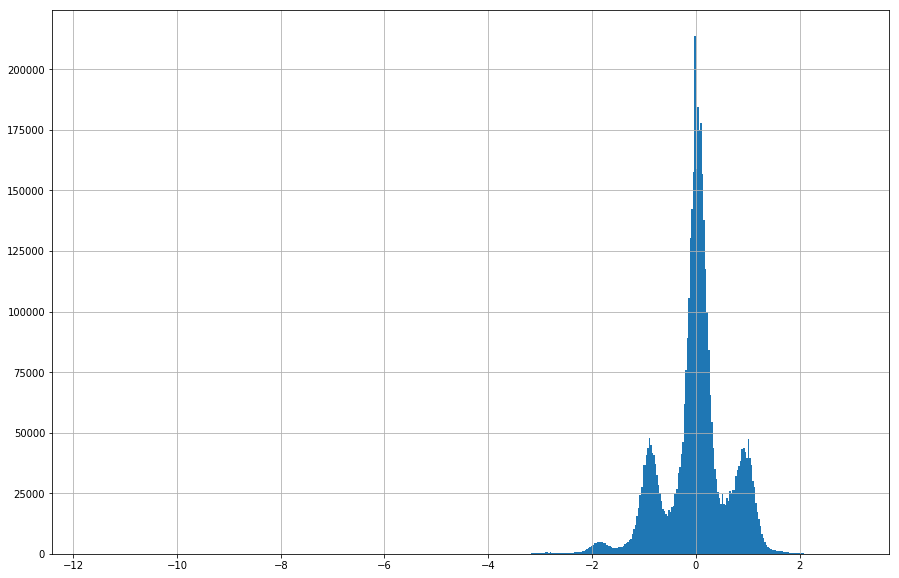

In [87]:
data.SG.hist(bins=500,figsize=(15,10));

In [52]:
tourn_num = []
tourn_num_dict = {}
for tup in data[['Permanent_Tournament_#','Year']].values: 
    if tuple(tup) not in tourn_num_dict:
        tourn_num_dict[tuple(tup)] = len(tourn_num_dict) + 1
    tourn_num.append(tourn_num_dict[tuple(tup)])

In [53]:
data['tourn_num'] = tourn_num

In [57]:
data.Par_Value.value_counts()

4    2654609
3    1003175
5     798612
Name: Par_Value, dtype: int64

In [67]:
def my_norm(x,BETA):
    return norm.pdf(x,0,BETA)/norm.pdf(0,0,BETA)

def normalized_performace(current_tourn_num,df):
    when = current_tourn_num-df.tourn_num.values
    weights = my_norm(when,normalized_performace.BETA)
    return np.dot(df.SG.values,weights)/np.sum(weights)
    
def number_observations(current_tourn_num,df):
    when = current_tourn_num-df.tourn_num.values
    weights = my_norm(when,normalized_performace.BETA)
    return np.sum(weights)

In [2]:
(600*1400*3*5*6)/1e6

75.6

In [3]:
1.2e9

1200000000.0

In [96]:
normalized_performace.BETA = 30
results = {}
for player,df in data[data['Player_#']==30925].groupby('Player_#'):
    for tup in sorted(tourn_num_dict,key=tourn_num_dict.get):
        tourn_num = tourn_num_dict[tup]
        for par_value in [3,4,5]:
            sub = df.loc[(df.tourn_num<tourn_num) & (df.Par_Value==par_value),['tourn_num','SG']]
            results[(player,tourn_num,par_value)] = (normalized_performace(tourn_num,sub),
                                                     number_observations(tourn_num,sub))

/Users/adamlevin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in double_scalars


In [97]:
len(results)/1812

1

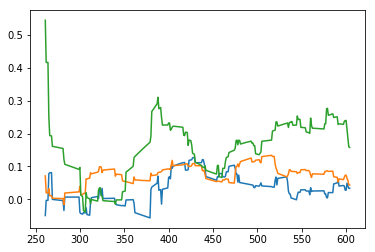

In [98]:
for par in [3,4,5]:
    x = [tup[1] for tup in results.iterkeys() if tup[2]==par]
    y = [results[tup][0] for tup in results.iterkeys() if tup[2]==par]
    x,y = np.array(x),np.array(y)
    y = y[np.argsort(x)]
    x = np.sort(x)
    x = x[~np.isnan(y)]
    y = y[~np.isnan(y)]
    plt.plot(x,y);
#     plt.show();

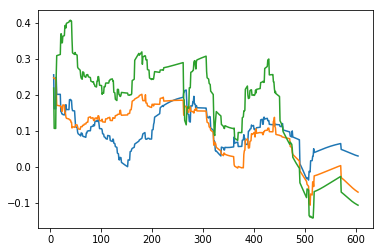

In [93]:
for par in [3,4,5]:
    x = [tup[1] for tup in results.iterkeys() if tup[2]==par]
    y = [results[tup][0] for tup in results.iterkeys() if tup[2]==par]
    x,y = np.array(x),np.array(y)
    y = y[np.argsort(x)]
    x = np.sort(x)
    x = x[~np.isnan(y)]
    y = y[~np.isnan(y)]
    plt.plot(x,y);
#     plt.show();

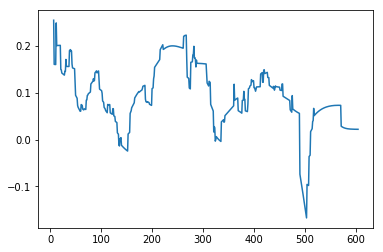

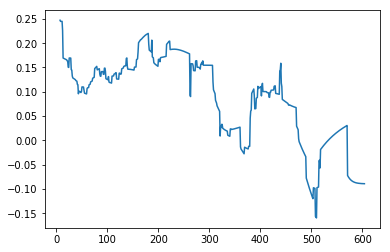

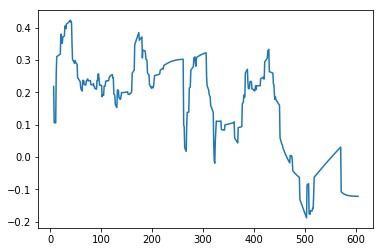

In [90]:
for par in [3,4,5]:
    x = [tup[1] for tup in results.iterkeys() if tup[2]==par]
    y = [results[tup][0] for tup in results.iterkeys() if tup[2]==par]
    x,y = np.array(x),np.array(y)
    y = y[np.argsort(x)]
    x = np.sort(x)
    x = x[~np.isnan(y)]
    y = y[~np.isnan(y)]
    plt.plot(x,y);
    plt.show();

In [ ]:
normalized_performace.BETA = 30
results = {}
for player,df in data.groupby('Player_#'):
    for perm_tourn_num,year in sorted(tourn_num_dict,key=tourn_num_dict.get):
        tourn_num = tourn_num_dict[tup]
        for par_value in [3,4,5]:
            sub = df.loc[(df.tourn_num<tourn_num) & (df.Par_Value==par_value),['tourn_num','SG']]
            results[(player,perm_tourn_num,year,par_value)] = (normalized_performace(tourn_num,sub),
                                                               number_observations(tourn_num,sub))